### Set up environment

In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.integrate as sint
from scipy.spatial import Voronoi
from scipy.sparse import csr_matrix

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
import os

In [3]:
%load_ext blackcellmagic

__Define RHS function(s)__

In [46]:
def tc_rhs_beta_g_normA(S, S_delay, Adj, sender_idx, beta_func, beta_args, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [47]:
def tc_rhs_beta_g_normA2(S, S_delay, Adj, sender_idx, beta_func, beta_args, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * (k + delta * S_delay)) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [48]:
def tc_rhs_beta_g_normA_inhib(S, S_delay, Adj, sender_idx, beta_func, beta_args, I, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * k) ** p 
            + (delta * (S_delay + I)) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

In [49]:
def tc_rhs_beta_g_normA2_inhib(S, S_delay, Adj, sender_idx, beta_func, beta_args, I, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of cell-cell contact 
    lengths `L`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            ((g ** 2) * (k + delta * (S_delay + I))) ** p 
            + S_bar ** p
        )
        - g * S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

<hr>

## Generate all figures for a trial set of parameters 

In [50]:
# Set whether to save figures
save_figs = False

# Set directory
dir_name = "plots"

In [51]:
# Set  name of trial
trial_name = "lowcis_expbeta"

# Random seed
seed = 2021

__Set growth min and max__

In [788]:
# Set min and max density
rho_min, rho_max = 1, 5.63040245

__Set RHS of dynamical equation__

In [789]:
# Set the RHS function in long-form
rhs_long = tc_rhs_beta_g_normA2
rhs_long_inhib = tc_rhs_beta_g_normA2_inhib

# Set beta(rho)
beta_func = lsig.beta_rho_exp
beta_args = (0.35,)   # parameter `m` for beta(rho)

__Set parameters for DDE integration__

In [790]:
# # Set DDE parameters
# alpha = 3
# k = 0.03
# p = 2
# delta = 1
# lambda_ = 1e-3
# g = 1

# # Set delay
# delay = 0.3

# # Package params
# param_names = ["alpha", "k", "p", "delta", "lambda_", "g"]
# param_vals = alpha, k, p, delta, lambda_, g

# # Package arguments for lsig.integrate_DDE and 
# #   lsig.integrate_DDE_varargs. Density param is 
# #   initialized with rho_min.
# dde_args = *param_vals, delay, rho_min

__Set max interaction radius__

In [791]:
# cell-cell distance (dimensionless)
r = 1.   

# maximum interaction radius in cell-lengths 
irad = 3 * r + 0.05

<hr>

## Fetch parameters

In [792]:
# Read trial parameters from CSV
params_df = pd.read_csv("parameters_" + trial_name + ".csv")
params_df

trial_name     parameter  value
0  lowcis_expbeta         alpha  3.000
1  lowcis_expbeta             k  0.030
2  lowcis_expbeta             p  2.000
3  lowcis_expbeta         delta  1.000
4  lowcis_expbeta       lambda_  0.001
5  lowcis_expbeta             g  1.000
6  lowcis_expbeta  beta_param_0  1.000
7  lowcis_expbeta         delay  0.300

In [793]:
# Get any arguments for beta function
is_beta_arg = [p.startswith("beta_") for p in params_df["parameter"].values]
beta_args   = params_df.value.values[is_beta_arg]

# Get the delay parameter
is_delay    = [p == "delay" for p in params_df["parameter"].values]
delay       = params_df.value.values[is_delay][0]

# Package all other parameters 
is_param    = [not (ba or d) for ba, d in zip(is_beta_arg, is_delay)]
param_names = params_df.parameter.values[is_param]
param_vals  = params_df.value.values[is_param]

# Package arguments for lsig.integrate_DDE and 
#   lsig.integrate_DDE_varargs. Density param is 
#   initialized with rho_min.
dde_args = *param_vals, rho_min

In [794]:
# Get `k` (may be used for thresholding)
where_k = next(i for i, pn in enumerate(param_names) if "k" == pn)
k = param_vals[where_k]

# Get `g`
where_g = next(i for i, pn in enumerate(param_names) if "g" == pn)
g = param_vals[where_g]

<hr>

## Save parameters

In [849]:
# params_df = pd.DataFrame({
#     "trial_name": trial_name,
#     "parameter":  param_names + ["beta_param_" + str(i) for i, _ in enumerate(beta_args)] + ["delay"],
#     "value":      list(param_vals)  + list(beta_args) + [delay],
# })

# params_df

In [850]:
# params_df.to_csv("parameters_" + trial_name + ".csv", index=False)

<hr>

### Maximum activation area vs. initial density

In [892]:
# Set DDE parameters
alpha = 3
k = 0.02
p = 2
delta = 1.5
lambda_ = 1e-3
g = 1

# Set delay
delay = 0.3

# Package params
param_names = ["alpha", "k", "p", "delta", "lambda_", "g"]
param_vals = alpha, k, p, delta, lambda_, g

# Package arguments for lsig.integrate_DDE and 
#   lsig.integrate_DDE_varargs. Density param is 
#   initialized with rho_min.
dde_args = *param_vals, rho_min

In [893]:
# Cutoff between activated/non-activated cells
thresh = 0.1

__Set figure parameters__

In [894]:
# Set # samples of initial density (rho0)
n_rho = 7
rho_0_range = (1, 4)

# Select runs to save
runs = (0, 2)

__Set time parameters__

In [895]:
# Set time parameters
tmax = 5
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [896]:
# Make square lattice
rows = cols = 44
X = lsig.hex_grid(rows, cols, r=r)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [897]:
# Get adjacency and normalize
# iAdj = lsig.irad_Adj(X, irad, sparse = True, row_stoch=True)
gAdj = lsig.gaussian_irad_Adj(X, irad, sparse=True, row_stoch=True)

__Set sender cell location__

In [898]:
# Set sender cell
sender_idx = lsig.get_center_cells(X)

__Get RHS of signaling DDE__

In [899]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(rhs_long, gAdj, sender_idx, beta_func, beta_args,)

__Run analysis for figure__

In [900]:
# Run simulation and make plot
res, plot = lsig.run_max_prop_area(
    t,
    X,
    sender_idx,
    rho_0_range[0],
    rho_0_range[1],
    n_rho,
    g,
    rhs,
    dde_args,
    delay,
    thresh,
    where_vars=6,
    progress_bar=True,
)

100%|██████████| 7/7 [00:00<00:00,  8.82it/s]


__Inspect individual runs__

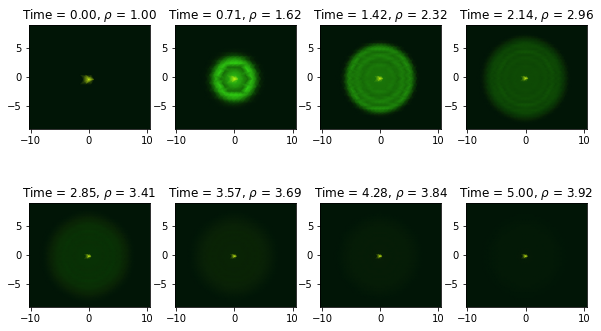

In [901]:
import matplotlib.pyplot as plt
%matplotlib inline

# Show still frames from a run
lsig.inspect_max_prop_results(
    res,
    0,
    rows,
    cols,
    vmax=1,
#     vmax="mult_k",
#     vmax_mult_k=25,
)

__Plot maximum propagation vs. density__

:Scatter   [rho_0]   (max_area)
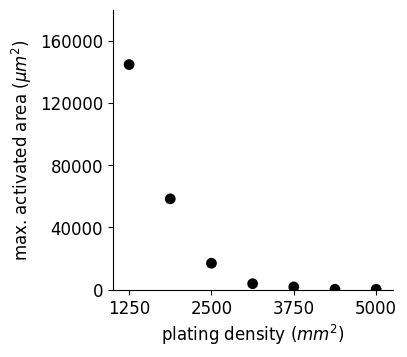

In [902]:
%%capture --no-display

plot = plot.opts(
#     title=f"delta = {delta:.1f}",
    ylim=(0, 180000),
    color="k",
    s=60,
    yticks=5,
    fontscale=1.2
)

hv.output(plot, dpi=100)

### Save plots and videos

In [903]:
%%capture --no-display

if save_figs:
    
    # Set plot filepath and format
    fmt = "png"
    plot_name = trial_name + "_dens_area_plot_irad_{0:.1f}".format(
        irad,
    ) + "." + fmt
    plot_path = os.path.join(dir_name, plot_name)

    hv.save(plot, plot_path, fmt=fmt, dpi=150)

In [904]:
import matplotlib.pyplot as plt
%matplotlib inline


if save_figs:
    for run in runs:
        
        # Set video filename
        vid_name = trial_name + "single_spot_vid_rho0_{0:.2f}_irad_{1:.1f}".format(
            res["rho_0_space"][run], irad
        )

        # Save colormesh
        lsig.save_max_prop_video(
            res,
            run,
            rows,
            cols,
            vid_name,
            n_interp=80,
            n_frames=75,
            fps=15,
            dir_name=dir_name,
            set_xylim="fit",
            vmax="mult_k",
#             sender_idx=np.nan,
            vmax_mult_k=25,
#             which_k=1,
        )

<hr>

### Propagation over time (biphasic vs. monophasic)

:Curve   [t]   (A_t)
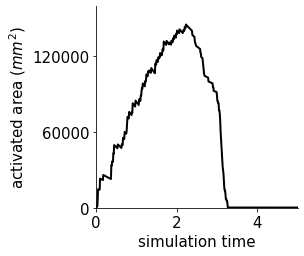

In [905]:
%%capture --no-display

data = {
    "t"   : t,
    "A_t" : res["A_rho0_t"][0],
}

plot = hv.Curve(
    data,
    kdims=["t"],
    vdims=["A_t"],
).opts(
    xlabel="simulation time",
    ylabel=r"activated area ($mm^2$)",
    color="k",
    ylim=(0, None),
    yticks=3,
    fontscale=1.5,
)

plot

### Save plots and videos

In [867]:
%%capture --no-display

if save_figs:
    
    # Set plot filepath and format
    fmt = "png"
    plot_name = trial_name + "_single_spot_area_plot_irad_{0:.1f}".format(
        irad
    ) + "." + fmt
    plot_path = os.path.join(dir_name, plot_name)

    hv.save(plot, plot_path, fmt=fmt, dpi=150)

<hr>

### Basal promoter activity phase plot (steady-state for $\alpha$ vs. $\lambda$)

__Set figure parameters__

In [631]:
# Set options for parameter sampling
log_lambda_minmax =  -6, -1    # lambda ~ [10**min, 10**max]
log_alpha_minmax  =  -1,  1    # alpha  ~ [10**min, 10**max]
n_lambda = 25 
n_alpha = 25

# number of replicates
n_reps = 5

__Set time parameters__

In [632]:
# Set time parameters
tmax = 5
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [633]:
# Make square lattice
rows = cols = 10
r = 1.   # cell-cell distance
X = lsig.hex_grid(rows, cols, r=r)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [634]:
# Calculate weighted adjacency using a truncated Gaussian
gAdj = lsig.gaussian_irad_Adj(X, irad, sparse=True, row_stoch=True)

__Set sender cell location__

In [635]:
# No senders
sender_idx = np.array([], dtype=int)

__Get RHS of signaling DDE__

In [636]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(rhs_long, gAdj, sender_idx, beta_func, beta_args,)

In [637]:
res, plots = lsig.run_basal_activity(
    t=t,
    n=n,
    log_lambda_minmax=log_lambda_minmax,
    log_alpha_minmax=log_alpha_minmax,
    n_lambda=n_lambda,
    n_alpha=n_alpha,
    n_reps=n_reps,
    rhs=rhs,
    dde_args=dde_args,
    delay=delay,
    thresh=thresh,
    seed=seed,
    progress_bar=True,
)

  3%|▎         | 102/3125 [00:02<01:18, 38.36it/s]


KeyboardInterrupt: 

In [ ]:
%%capture --no-display

hv.Layout(plots).cols(2)

### Save plots and videos

In [ ]:
# Specify what each plot in `plots` contains
plots_labels = ["_pctfluor", "_pctfluor_text", "_meanfluor", "_meanfluor_text"]

In [ ]:
%%capture --no-display

if save_figs:
    
    # Set plot filepath and format
    fmt = "png"
    plot_names = [
        trial_name + "_basal_activity{0}_plot_irad_{1:.1f}".format(
            plots_labels[i], irad,
        ) + "." + fmt
        for i, _ in enumerate(plots)
    ]
    plot_paths = [os.path.join(dir_name, pn) for pn in plot_names]

    for p_, pp in zip(plots, plot_paths):
        hv.save(p_, pp, fmt=fmt, dpi=150)

<hr>

### Boundary formation with an inhibitor gradient

__Set figure parameters__

In [ ]:
# Length of long axis
L = 200

# Percent sender cells
pct_s = 1

I0 = 0.4

__Set time parameters__

In [407]:
# Set time parameters
tmax = 1.4
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [408]:
# Make lattice and get adjacency matrix
rows, cols = int(L/4), int(L)
X = lsig.hex_grid(rows, cols, r=r)

# Shift coordinates to nonnegative
X = X - X.min(axis=0)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [409]:
# Calculate weighted adjacency using a truncated Gaussian
gAdj = lsig.gaussian_irad_Adj(X, irad, sparse=True, row_stoch=True)

# # If there are periodic boundaries, remove them in the x-direction
gAdj[:rows, -rows:] = 0
gAdj[-rows:, :rows] = 0

C:\Users\Pranav\Anaconda3\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


__Set sender cell location__

In [410]:
# Set seed
np.random.seed(seed)

# Specify percent of population that is sender
n_s = int(n * (pct_s/100)) + 1

# Assign senders randomly
sender_idx = np.random.choice(n, n_s, replace=False)

__Get RHS of signaling DDE__

In [411]:
@numba.njit
def I_x_exp(x, I0, b):
    """Inhibitor concentration (exponential gradient)"""
    return I0 * np.exp(-b * x)

In [412]:
# Set inhibitor decay constant
b = 5 * np.log(2) / L

# Calculate inhibitor concentration
I = I_x_exp(X[:, 0], I0, b)

In [413]:
rhs_noinhib = lsig.get_DDE_rhs(rhs_long, gAdj, sender_idx, beta_func, beta_args,)
rhs_inhib   = lsig.get_DDE_rhs(rhs_long_inhib, gAdj, sender_idx, beta_func, beta_args, I)

In [414]:
# Initialize fluorescence
S0 = np.zeros(n, dtype=np.float32)
S0[sender_idx] = 1

# Calculate logistic growth
rho_t = lsig.logistic(t, g, rho_min, rho_max)

# Simulate
S_t_inhib = lsig.integrate_DDE_varargs(
    t,
    rhs_inhib,
    var_vals=rho_t,
    dde_args=dde_args,
    E0=S0,
    delay=delay,
    where_vars=6,
    progress_bar=True,
)

S_t_noinhib = lsig.integrate_DDE_varargs(
    t,
    rhs_noinhib,
    var_vals=rho_t,
    dde_args=dde_args,
    E0=S0,
    delay=delay,
    where_vars=6,
    progress_bar=True,
)

100%|██████████| 140/140 [00:00<00:00, 1417.97it/s]


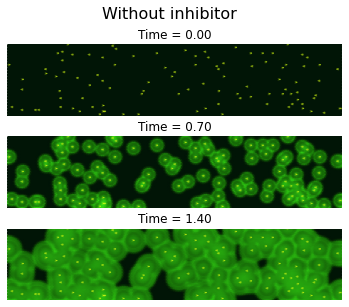

In [415]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 3, 1

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(6 * ncols, 1.6 * nrows)
)
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X,
        rows=rows,
        cols=cols,
        var=S_t_noinhib, 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        title=title,
        axis_off=True
    )

fig.suptitle("Without inhibitor", fontsize=16);

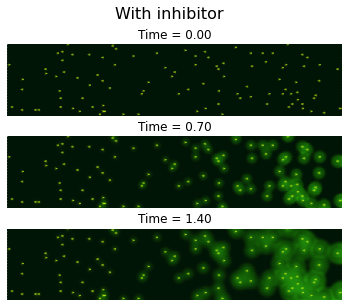

In [416]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set dimensions for a grid of frames
nrows, ncols = 3, 1

# Render frames
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(6 * ncols, 1.6 * nrows)
)
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X,
        rows=rows,
        cols=cols,
        var=S_t_inhib, 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        title=title,
        axis_off=True
    )

fig.suptitle("With inhibitor", fontsize=16);

### Save still frames

In [417]:
# Specify which frames to sample from which condition(s)
frame_info = np.array(
    [
        # time index   inhibitor presence (Boolean)
        (  0,           0,        ),
        (  0,           1,        ),
        (  70,          0,        ),
        (  70,          1,        ),
        (  140,         0,        ),
        (  140,         1,        ),
    ]
)

In [109]:
if save_figs:

    # Set plot filepath and format
    fmt = "png"

    # Specify what each frame in `plots` contains
    frame_names = [
        trial_name
        + ("_noinhib", "_inhib")[i[1]]
        + f"_time_{t[i[0]]:.2f}"
        + f"_irad_{irad:.1f}"
        + "."
        + fmt
        for i in frame_info
    ]

    frame_paths = [os.path.join(dir_name, fn) for fn in frame_names]

In [110]:
%matplotlib inline

if save_figs:
    
    for i, fp in enumerate(frame_paths):
        ti = frame_info[i][0]
        S_t = (S_t_noinhib, S_t_inhib)[frame_info[i][1]]
        
        lsig.inspect_interp_mesh(
            X=X,
            var=S_t, 
            n_interp=(50, 200),
            idx=ti,
            vmin=0, 
            vmax=1, 
            cmap="kgy",
            axis_off=True
        )
        
        plt.savefig(fp, dpi=150, format=fmt,)

<hr>

### Drug effects

__Set figure parameters__

In [922]:
# Set parameters for each drug condition
# drug_params = [
#     #  g  rho_0  rho_max
#     (1.0,     1,       4),  # drug-free
#     (2.0,     1,       4),  # FGF2
#     (1.0,     1,       2),  # Ri
# ]

drug_params = [
    #  g  rho_0  rho_max
    (1.00000000,     1,       5.63040245),  # drug-free
    (2.00727736,     1,       4.54356075),  # FGF2
    (0.43015930,     1,       2.18426823),  # Ri
]

pct_s = 1

ks = 3

__Set time parameters__

In [923]:
# Set time parameters
tmax = 5
nt_t = 100
nt = int(nt_t * tmax) + 1
t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [924]:
# Make lattice and get adjacency matrix
rows = cols = 150
X = lsig.hex_grid(rows, cols, r=r)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [925]:
from scipy.sparse import csr_matrix, diags, identity
import scipy.stats

def k_step_Adj(k, rows, cols=0, dtype=np.float32, row_stoch=False, **kwargs):
    """
    """
    
    if not cols:
        cols = rows
        
    # Construct adjacency matrix
    a = lsig.make_Adj_sparse(rows, cols, dtype=dtype, **kwargs)
    
    # Add self-edges
    n = rows * cols
    eye = identity(n).astype(dtype)
    A = (a + eye)
    
    # Compute number of paths of length k between nodes
    A = A ** k
    
    # Store as 0. or 1.
    A = (A > 0).astype(dtype)
    
    # Remove self-edges
    A = A - diags(A.diagonal())
    
    if row_stoch:
        rowsum = np.sum(A, axis=1)
        A = csr_matrix(A / rowsum)
    
    return A

In [926]:
# Calculate cell adjacency
ksAdj = k_step_Adj(ks, rows, cols, row_stoch=True)

__Set sender cell location__

In [927]:
# Set seed
np.random.seed(seed)

# Specify percent of population that is sender
n_s = int(n * (pct_s/100)) + 1

# Assign senders randomly
sender_idx = np.random.choice(n, n_s, replace=False)

__Get RHS of signaling DDE__

In [928]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(rhs_long, ksAdj, sender_idx, beta_func, beta_args,)

In [929]:
# Get initial conditions
S0 = np.zeros(n)
S0[sender_idx] = 1

In [930]:
# Make mutable copy of dde args
args = list(dde_args)

# Initialize results vectors
rho_drug_t = np.empty((3, nt), dtype=np.float32)
X_drug_t = np.empty((3, nt, n, 2), dtype=np.float32)
S_drug_t = np.empty((3, nt, n), dtype=np.float32)

for i in range(3):

    # Get parameters
    g_, rho_0_, rho_max_ = drug_params[i]
    
    # Calculate density and contact length
    rho_t = lsig.logistic(t, g_, rho_0_, rho_max_)
    r_t = 1/np.sqrt(rho_t)

    # Get cell positions
    X_t = np.empty((nt, n, 2))
    X_t[:, :, 0] = np.outer(r_t, X[:, 0])
    X_t[:, :, 1] = np.outer(r_t, X[:, 1])
    
    args[where_g] = g_
    
    # Simulate
    S_t = lsig.integrate_DDE_varargs(
        t,
        rhs,
        var_vals=rho_t,
        where_vars=6,
        dde_args=args,
        E0=S0,
        delay=delay
    )
    
    # Save results
    rho_drug_t[i] = rho_t
    X_drug_t[i] = X_t
    S_drug_t[i] = S_t

In [931]:
# Get activated cells
S_act_t = S_drug_t > thresh
S_act_num = S_act_t.sum(axis=2)

# Activated area
A_act_drug = np.array([lsig.A_cells_um(S_act_num[i], rho_drug_t[i]) for i in range(3)])

# Mean fluorescence
S_mean_t = S_drug_t.mean(axis=2)

# Percent of cells activated
S_prop_t = S_act_t.mean(axis=2)


:Overlay
   .Curve.Drug_hyphen_minus_free :Curve   [x]   (y)
   .Curve.FGF2                   :Curve   [x]   (y)
   .Curve.Ri                     :Curve   [x]   (y)
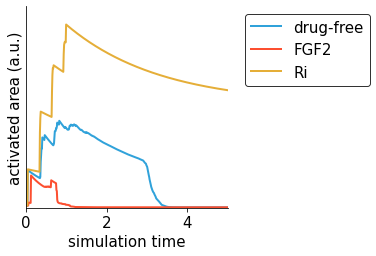

In [932]:
%%capture --no-display

plot = hv.Overlay(
    [
        hv.Curve(
            data = (t, A_act_drug[i]),
            label = ("drug-free", "FGF2", "Ri")[i],
        ).opts(
            xlabel = r"simulation time",
            xlim = (0, None),
            ylabel = r"activated area (a.u.)",
            ylim = (0, None),
            yticks = 0,
            fontscale=1.5
        )
        for i in range(3)
    ]
).opts(
    legend_position="right"
)

plot

:Overlay
   .Curve.Drug_hyphen_minus_free :Curve   [x]   (y)
   .Curve.FGF2                   :Curve   [x]   (y)
   .Curve.Ri                     :Curve   [x]   (y)
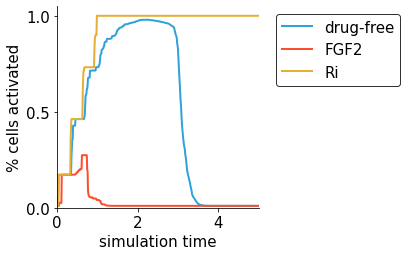

In [933]:
%%capture --no-display

plot2 = hv.Overlay(
    [
        hv.Curve(
            data = (t, S_prop_t[i]),
            label = ("drug-free", "FGF2", "Ri")[i],
        ).opts(
            xlabel = r"simulation time",
            xlim = (0, None),
            ylabel = r"% cells activated",
            ylim = (0, 1.05),
            yticks = (0, 0.5, 1),
            fontscale=1.5
        )
        for i in range(3)
    ]
).opts(
    legend_position="right"
)

plot2

<hr>

### Save plots and videos

In [66]:
# Make list of drug names for filename
drug_names = ["untreated", "FGF2", "ROCKi"]

In [67]:
%%capture --no-display

if True:
# if save_figs:
    
    # Set plot filepath and format
    fmt = "png"
    plot_name = trial_name + "_drug_conditions_plot_irad_{0:.1f}_ks_{1}".format(
        irad, ks
    ) + "." + fmt
    plot_path = os.path.join(dir_name, plot_name)

    hv.save(plot, plot_path, fmt=fmt, dpi=150)
    

Writing to: plots\lowcis_expbeta_untreated_vid_irad_3.0_ks1
Writing to: plots\lowcis_expbeta_FGF2_vid_irad_3.0_ks1
Writing to: plots\lowcis_expbeta_ROCKi_vid_irad_3.0_ks1


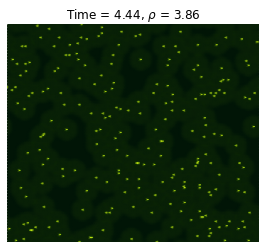

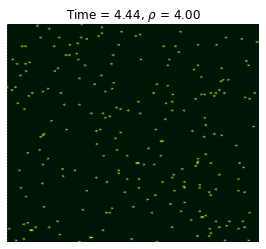

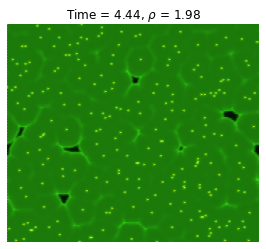

In [69]:
if save_figs:
    for drug in range(3):
        
        vid_name = trial_name + "_{0}_vid_irad_{1:.1f}_ks{2}".format(
            drug_names[drug], irad, ks
        )
        
        # Function for plot title
        title_fun = lambda i: f"Time = {t[i]:.2f}, " + r"$\rho$" + f" = {rho_drug_t[drug, i]:.2f}"

        lsig.animate_colormesh(
            X_arr=X_drug_t[drug],
            rows=rows,
            cols=cols,
            var_t=S_drug_t[drug],
#             n_interp=51,
            n_frames=75,
            file_name=vid_name,
            dir_name=dir_name,
            fps=15, 
            vmin=0, 
            vmax=1, 
            cmap="kgy",
            title_fun=title_fun,
            axis_off=True,
        #     xlim=xlim_,
        #     ylim=ylim_,
        )

<hr>

### Under development


Gaussian adjacency based on graph distance for very large numbers of cells ~ >10k (may fail due to excessive memory requirements)

In [ ]:
from scipy.sparse import csr_matrix
import scipy.stats

def gauss_kn_Adj_sparse(kn, r, rows, cols=0, dtype=np.float32, **kwargs):
    """
    Construct adjacency matrix for a periodic array of 
    nodes (cells). Adjacency is determined by calculating pairwise 
    distance and applying a threshold `irad` (interaction radius)
    """
    
    if not cols:
        cols = rows
    
    n = rows * cols
    
    # Construct adjacency matrix
    a = lsig.make_Adj_sparse(rows, cols, dtype=dtype, **kwargs)
    eye = csr_matrix((np.ones(n, dtype=dtype), (np.arange(n), np.arange(n))))
    
    if kn == 1:
        return a
    
    A = a.copy()
    A[a.nonzero()] = scipy.stats.norm.pdf(loc=1, scale = kn/2)
    
    for j in range(2, kn):
        a1 = (a + eye) ** (j-1)
        a2 = (a + eye) ** j
        nb = np.logical_xor(a2 > 0, a1 > 0).nonzero()
        w = scipy.stats.norm.pdf(loc=j, scale = kn/2)
        A[nb] = w
    
    rowsum = np.sum(A, axis=1)[:, np.newaxis]
    A = np.divide(A, rowsum)
    
    return A